In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style="white",color_codes=True)
plt.rcParams['figure.figsize'] = (15,9.27)
# Set the font set of the latex code to computer modern
matplotlib.rcParams['mathtext.fontset'] = "cm"

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
new = titanic.drop(['deck'],axis=1).dropna()

In [6]:
new.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [7]:
new.groupby('age')

In [8]:
data = [[4,5,6],[7,8,9],[10,11,12]]
index = [1,2,3]
col = ['a','b','c']
df = pd.DataFrame(data=data,index=index,columns=col)

In [9]:
df

,a,b,c
1,4,5,6
2,7,8,9
3,10,11,12


In [10]:
df.loc[1,'a']

4

In [11]:
df.iloc[0,0]

4

In [13]:
mtcars = sns.load_dataset('mpg')

In [16]:
mtcars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [17]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [19]:
mtcars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


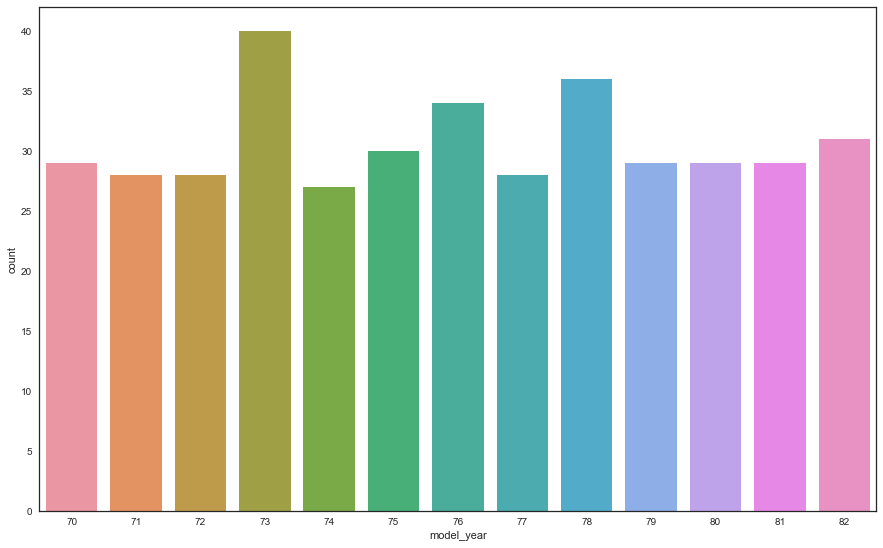

In [57]:
sns.countplot(mtcars.model_year)

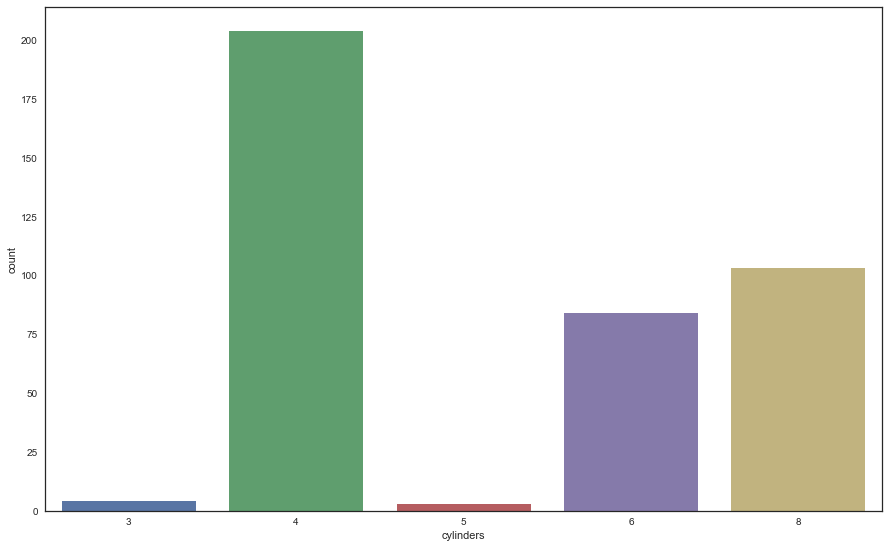

In [44]:
sns.countplot(mtcars.cylinders)

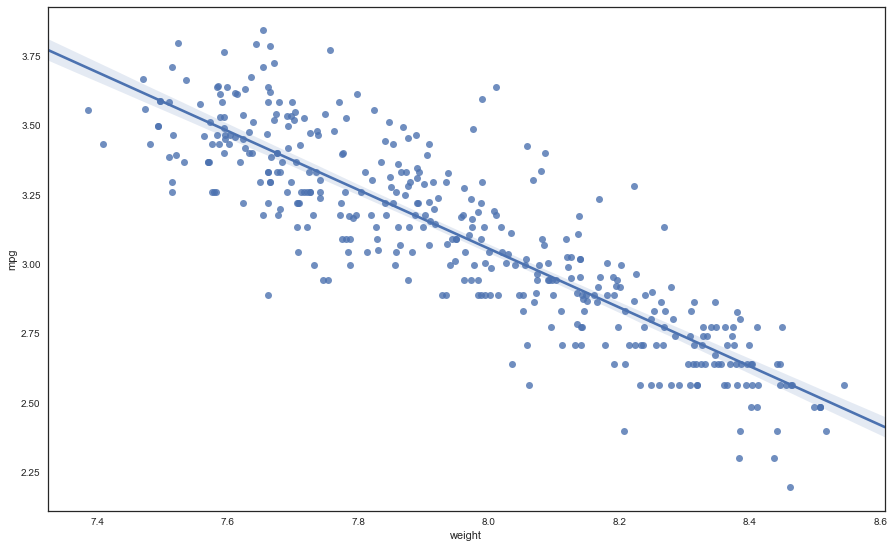

In [53]:
sns.regplot(np.log(mtcars.weight),np.log(mtcars.mpg))

In [59]:
def reg(y,*args):
    import statsmodels.api as sm
    x = np.vstack((args)).T
    mat_x = sm.add_constant(x)
    res = sm.OLS(y,mat_x).fit()
    print(res.summary())

In [60]:
reg(np.log(mtcars.weight),np.log(mtcars.mpg))

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1287.
Date:                Wed, 19 Sep 2018   Prob (F-statistic):          1.75e-126
Time:                        17:04:46   Log-Likelihood:                 229.39
No. Observations:                 398   AIC:                            -454.8
Df Residuals:                     396   BIC:                            -446.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1979      0.063    162.277      0.0

In [63]:
mtcars['gp100k'] = 160/mtcars['mpg']

In [64]:
mtcars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gp100m,gp100k
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,5.555556,8.888889
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,6.666667,10.666667
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,5.555556,8.888889
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,6.250000,10.000000
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,5.882353,9.411765
